In [1]:
import pandas as pd
import numpy as np
import quandl
import re
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import rpy2

In [2]:
quandl.ApiConfig.api_key = 'svJ3hzKd6LTpRvcsjW_7'
end = dt.date.today()
start = dt.date(end.year - 4, end.month, end.day)

In [3]:
def pricelookup(tickers):
    querylis = []
    for x in tickers:
        x = re.sub('-', '_', x)
        term = 'EOD/' + x + '.11'
        querylis.append(term)
    df = quandl.get(querylis, start_date=start, end_date=end)
    df = df.rename(columns=lambda x: re.sub('EOD/', '', x))
    df = df.rename(columns=lambda x: re.sub(' - Adj_Close', '', x))
    df = df.rename(columns=lambda x: re.sub(' - Not Found', '', x))
    df = df.fillna(method='bfill')
    df = df.sort_index(axis=1)
    return df

In [4]:
spy = pricelookup(['SPY'])

In [5]:
from rpy2.robjects import r, pandas2ri

In [6]:
pandas2ri.activate()

In [7]:
rframe = pandas2ri.py2ri(spy)

In [8]:
rframe

SPY
165.315587


In [9]:
print(rframe)

                         SPY
2013-12-16 00:00:00 165.3156
2013-12-17 00:00:00 164.7898
2013-12-18 00:00:00 167.6032
2013-12-19 00:00:00 167.4095
2013-12-20 00:00:00 168.3780
2013-12-23 00:00:00 169.2776
2013-12-24 00:00:00 169.6485
2013-12-26 00:00:00 170.5110
2013-12-27 00:00:00 170.5018
2013-12-30 00:00:00 170.4739
2013-12-31 00:00:00 171.2808
2014-01-02 00:00:00 169.6393
2014-01-03 00:00:00 169.6114
2014-01-06 00:00:00 169.1199
2014-01-07 00:00:00 170.1586
2014-01-08 00:00:00 170.1957
2014-01-09 00:00:00 170.3070
2014-01-10 00:00:00 170.7707
2014-01-13 00:00:00 168.4986
2014-01-14 00:00:00 170.3348
2014-01-15 00:00:00 171.2529
2014-01-16 00:00:00 171.0304
2014-01-17 00:00:00 170.3070
2014-01-21 00:00:00 170.8078
2014-01-22 00:00:00 170.9191
2014-01-23 00:00:00 169.5187
2014-01-24 00:00:00 165.9019
2014-01-27 00:00:00 165.0858
2014-01-28 00:00:00 166.0688
2014-01-29 00:00:00 164.4737
2014-01-30 00:00:00 166.2172
2014-01-31 00:00:00 165.2434
2014-02-03 00:00:00 161.5246
2014-02-04 00:

In [10]:
from rpy2.robjects.packages import importr

In [11]:
gmdh = importr('GMDH')

In [12]:
type(gmdh)

rpy2.robjects.packages.InstalledSTPackage

In [13]:
stats = importr('stats')

In [14]:
rframe = stats.ts(rframe)

In [15]:
result = gmdh.fcast(rframe)

    
 Point Forecast
    Lo 95
    Hi 95

1009
       266.1492
 263.2535
 269.0449

1010
       266.4157
 262.3614
 270.4700

1011
       266.6808
 261.7848
 271.5769

1012
       266.8161
 261.2368
 272.3955

1013
       267.0016
 260.9042
 273.0991




In [16]:
type(result)

rpy2.robjects.vectors.ListVector

In [17]:
spy.head()

,SPY
Date,
2013-12-16,165.315587
2013-12-17,164.789802
2013-12-18,167.603177
2013-12-19,167.409477
2013-12-20,168.378009


In [18]:
myresult = pandas2ri.ri2py(result)

In [19]:
myresult

R object with classes: ('list',) mapped to:
<ListVector - Python:0x10d49fc48 / R:0x7f880336c4d8>
[Str..., Flo..., Flo..., Flo..., Flo..., Mat..., Flo..., Flo...]
  method: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x10d2bcc88 / R:0x7f88033c0058>
['GMDH with input = 4 and layer = 3']
  mean: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('ts',) mapped to:
<FloatVector - Python:0x10d28e688 / R:0x7f880336ca20>
[266.149191, 266.415701, 266.680812, 266.816146, 267.001636]
  lower: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('ts',) mapped to:
<FloatVector - Python:0x10d28e908 / R:0x7f880336c8e8>
[263.253529, 262.361406, 261.784768, 261.236751, 260.904187]
  upper: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('ts',) mapped to:
<FloatVector - Python:0x10d28ee08 / R:0x7f880336c7b0>
[269.044853, 270.469995, 271.576855, 272.395541, 273.099085]
  level: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x10d28e948 / R:0x7f87fb2d46b8>
[95.000000]
  x: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('ts',) mapped to:
<Matrix - Python:0x10d4ab1c8 / R:0x7f87f7eba800>
[165.315587, 164.789802, 167.603177, 167.409477, ..., 266.310000, 266.780000, 266.750000, 265.660000]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('ts',) mapped to:
<FloatVector - Python:0x10d4c0f48 / R:0x7f87f7d67c00>
[0.595177, 0.483174, -0.002323, 0.513847, ..., 0.931451, 0.593750, 0.021030, -1.245153]
  fitted: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('ts',) mapped to:
<FloatVector - Python:0x10d4c0c48 / R:0x7f87f7c83400>
[167.782832, 168.794410, 169.650859, 169.997175, ..., 265.378549, 266.186250, 266.728970, 266.905153]

In [20]:
type(myresult)

rpy2.robjects.vectors.ListVector

In [21]:
panresult = pd.Series(myresult[1])

In [22]:
len(panresult[0])

5

In [23]:
a = []

In [24]:
for i in panresult[0]:
    a.append(i)

In [25]:
len(a)

5

In [26]:
a

[266.1491909017953,
 266.41570055100357,
 266.68081152058903,
 266.816146105965,
 267.00163590018906]

In [27]:
spy = spy.reset_index()

In [28]:
spy.tail()

,Date,SPY
1003,2017-12-08,265.51
1004,2017-12-11,266.31
1005,2017-12-12,266.78
1006,2017-12-13,266.75
1007,2017-12-14,265.66


In [29]:
a = pd.Series(a)

In [30]:
len(a)

5

In [31]:
for i in range(5):
    place = len(spy) + 1
    spy.loc[place, 'SPY'] = a[i]

In [32]:
spy.tail()

,Date,SPY
1009,NaT,266.149191
1010,NaT,266.415701
1011,NaT,266.680812
1012,NaT,266.816146
1013,NaT,267.001636


In [33]:
spy[1007:]

,Date,SPY
1007,2017-12-14,265.660000
1009,NaT,266.149191
1010,NaT,266.415701
1011,NaT,266.680812
1012,NaT,266.816146
1013,NaT,267.001636


In [34]:
spy = spy.reset_index(drop=True)

In [35]:
spy.tail()

,Date,SPY
1008,NaT,266.149191
1009,NaT,266.415701
1010,NaT,266.680812
1011,NaT,266.816146
1012,NaT,267.001636


In [36]:
samp = spy.loc[1007, 'Date']

In [37]:
for i in range(1008, 1013):
    samp += dt.timedelta(days=1)
    spy.loc[i, 'Date'] = samp

In [38]:
spy.tail()

,Date,SPY
1008,2017-12-15,266.149191
1009,2017-12-16,266.415701
1010,2017-12-17,266.680812
1011,2017-12-18,266.816146
1012,2017-12-19,267.001636


In [39]:
spy = spy.set_index('Date')

In [40]:
spy.plot()

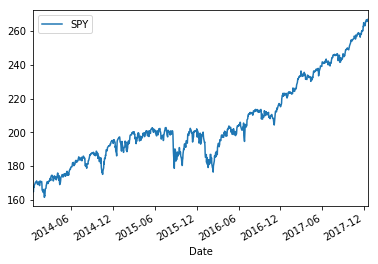

In [41]:
plt.show()

In [42]:
spy['forecast'] = np.nan

In [43]:
spy['forecast'][1008:] = spy['SPY'][1008:]

In [44]:
spy.plot()

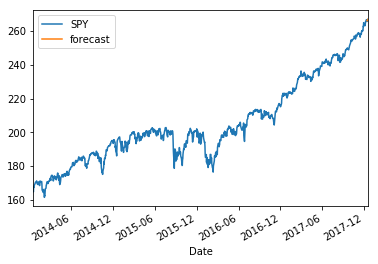

In [45]:
plt.show()

In [54]:
spy2 = spy[950:]

In [55]:
spy2.plot()

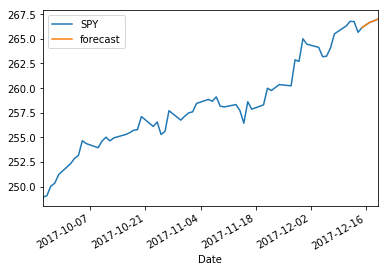

In [56]:
plt.show()